## **Práctica 6 - TAA**

_Pablo Martín de Benito_


***

In [1]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

#%matplotlib qt


In [2]:
digitos = load_digits()

In [3]:
print(digitos.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [4]:
len(digitos.feature_names)

64

In [5]:
df = pd.DataFrame(columns=digitos.feature_names, data= digitos.data)
df.insert(loc=len(digitos.feature_names), column='digito', value = digitos.target)

In [6]:
df

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,digito
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


In [7]:
escala = MinMaxScaler()
X = escala.fit_transform(digitos.data)

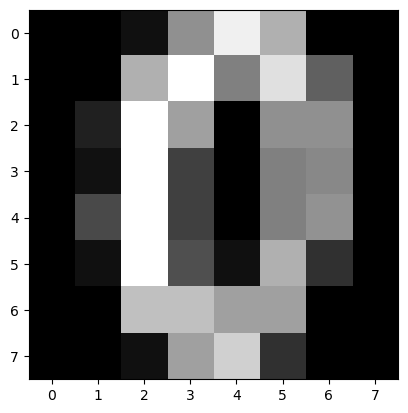

In [8]:
X_image = X.reshape(-1,8,8)
plt.imshow(X_image[10], cmap='gray',vmin=0.0, vmax=1.0)

In [9]:
y = digitos.target

### **_Parte 1_**

In [10]:
import warnings, time
warnings.filterwarnings('ignore')

In [11]:
from tqdm import tqdm
# Herramienta para mostrar la barra de progreso hasta que termina.
# Si la barra de estado se referia a h, pues funciona asi.

In [12]:
accuracy = np.zeros((10,15), dtype=float)
# Primero tenemos que organizar los experimentos.
# ir variando el h, controlando el holdout repetido
# para cada division aprendizaje test, va haciendo pasar el numero de vecinos más proximo para esa división test aprendizaje.
for h in tqdm(range(10)):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=1/3, stratify=y)  #stratify=y  ->  y es la lista de salidas deseadas.
    for k in range(1,16):
        clf = KNeighborsClassifier(n_neighbors=k, algorithm='brute')
        clf.fit(X_train,y_train)
        accuracy[h, k-1] = clf.score(X_test, y_test)
    #print(h, end="")

100%|██████████| 10/10 [00:00<00:00, 12.56it/s]


In [13]:
aciertos = np.mean(accuracy, axis=0)
aciertos = list(aciertos)

for k in range(1,16):
    print("Para k =   " + str(k) + ", Tasa de aciertos:  " + str(aciertos[k-1]))

Para k =   1, Tasa de aciertos:  0.9874791318864773
Para k =   2, Tasa de aciertos:  0.9829716193656093
Para k =   3, Tasa de aciertos:  0.9863105175292153
Para k =   4, Tasa de aciertos:  0.983973288814691
Para k =   5, Tasa de aciertos:  0.984474123539232
Para k =   6, Tasa de aciertos:  0.9813021702838063
Para k =   7, Tasa de aciertos:  0.9833055091819698
Para k =   8, Tasa de aciertos:  0.9801335559265443
Para k =   9, Tasa de aciertos:  0.980133555926544
Para k =   10, Tasa de aciertos:  0.9782971619365608
Para k =   11, Tasa de aciertos:  0.9781302170283807
Para k =   12, Tasa de aciertos:  0.9769616026711183
Para k =   13, Tasa de aciertos:  0.9751252086811352
Para k =   14, Tasa de aciertos:  0.974457429048414
Para k =   15, Tasa de aciertos:  0.9726210350584307


_Gráfico de Barras_

Text(0.5, 1.0, 'DataSet: DIGITS(1797)')

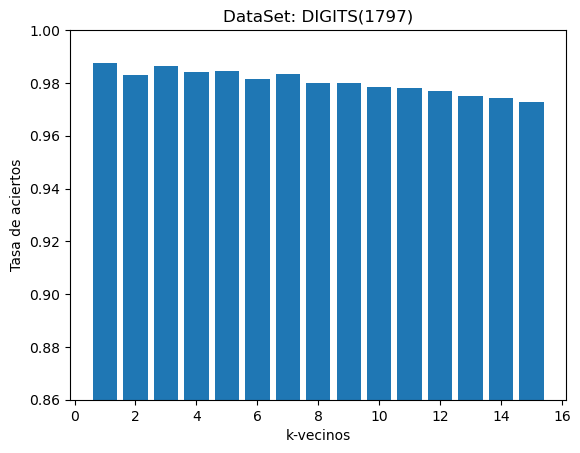

In [14]:
plt.bar(range(1,16),aciertos)
plt.ylim((0.86, 1))

plt.xlabel('k-vecinos')
plt.ylabel('Tasa de aciertos')
plt.title('DataSet: DIGITS(1797)')

In [15]:
print("La máxima tasa de aciertos se obtiene con k = " + str(aciertos.index(max(aciertos))+1) + " -> " + str(max(aciertos)))

La máxima tasa de aciertos se obtiene con k = 1 -> 0.9874791318864773


### **_Parte 2_**

In [16]:
digitos.data
digitos2 = digitos.data


In [17]:
X2 = X == 0
X2 = X.astype(int)
X2

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [18]:
accuracy2 = np.zeros((10,15), dtype=float)
# Primero tenemos que organizar los experimentos.
# ir variando el h, controlando el holdout repetido
# para cada division aprendizaje test, va haciendo pasar el numero de vecinos más proximo para esa división test aprendizaje.
for h in tqdm(range(10)):
    X_train, X_test, y_train, y_test = train_test_split(X2,y,test_size=1/3, stratify=y)  #stratify=y  ->  y es la lista de salidas deseadas.
    for k in range(1,16):
        clf = KNeighborsClassifier(n_neighbors=k, algorithm='brute')
        clf.fit(X_train,y_train)
        accuracy[h, k-1] = clf.score(X_test, y_test)
    #print(h, end="")

100%|██████████| 10/10 [00:03<00:00,  2.74it/s]


In [19]:
aciertos = np.mean(accuracy, axis=0)
aciertos = list(aciertos)

for k in range(1,16):
    print("Para k =   " + str(k) + ", Tasa de aciertos:  " + str(aciertos[k-1]))

Para k =   1, Tasa de aciertos:  0.598330550918197
Para k =   2, Tasa de aciertos:  0.5719532554257095
Para k =   3, Tasa de aciertos:  0.6006677796327211
Para k =   4, Tasa de aciertos:  0.6075125208681136
Para k =   5, Tasa de aciertos:  0.6148580968280468
Para k =   6, Tasa de aciertos:  0.615525876460768
Para k =   7, Tasa de aciertos:  0.6222036727879799
Para k =   8, Tasa de aciertos:  0.621702838063439
Para k =   9, Tasa de aciertos:  0.6242070116861436
Para k =   10, Tasa de aciertos:  0.6257095158597663
Para k =   11, Tasa de aciertos:  0.6258764607679466
Para k =   12, Tasa de aciertos:  0.6307178631051753
Para k =   13, Tasa de aciertos:  0.6290484140233723
Para k =   14, Tasa de aciertos:  0.6277128547579298
Para k =   15, Tasa de aciertos:  0.6265442404006678


_Gráfico de Barras_

In [20]:
#%matplotlib qt

Text(0.5, 1.0, 'DataSet: DIGITS(1797)')

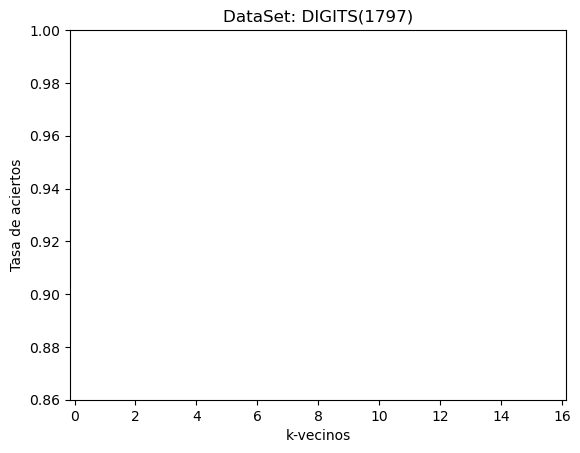

In [21]:
plt.bar(range(1,16),aciertos)
plt.ylim((0.86, 1))

plt.xlabel('k-vecinos')
plt.ylabel('Tasa de aciertos')
plt.title('DataSet: DIGITS(1797)')

In [22]:
print("La máxima tasa de aciertos se obtiene con k = " + str(aciertos.index(max(aciertos))+1) + " -> " + str(max(aciertos)))

La máxima tasa de aciertos se obtiene con k = 12 -> 0.6307178631051753
